In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import joblib

In [2]:
train_df = pd.read_csv(r"C:\Users\mouni\Downloads\house-prices-advanced-regression-techniques\train.csv")
test_df = pd.read_csv(r"C:\Users\mouni\Downloads\house-prices-advanced-regression-techniques\test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (1460, 81)
Test shape: (1459, 80)


In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
train_df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
train_df.drop_duplicates(inplace=True)
print("Duplicates removed. Shape:", train_df.shape)

Duplicates removed. Shape: (1460, 81)


In [9]:
test_df.drop_duplicates(inplace=True)
print("Duplicates removed. Shape:", test_df.shape)

Duplicates removed. Shape: (1459, 80)


Finding No.of Missing Values

In [10]:
train_df.isnull().sum().sort_values(ascending=False).head(15)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
dtype: int64

In [11]:
test_df.isnull().sum().sort_values(ascending=False).head(15)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageFinish      78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
dtype: int64

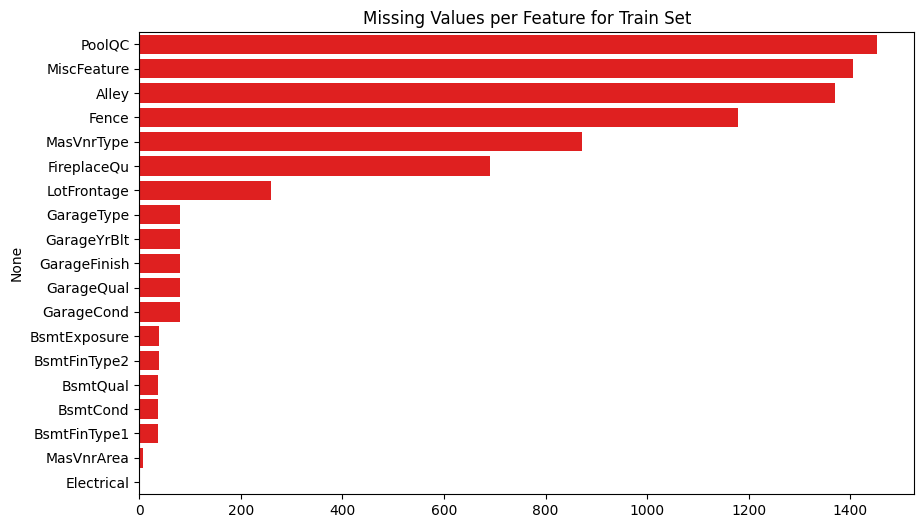

In [12]:
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index, color="red")
plt.title("Missing Values per Feature for Train Set")
plt.show()

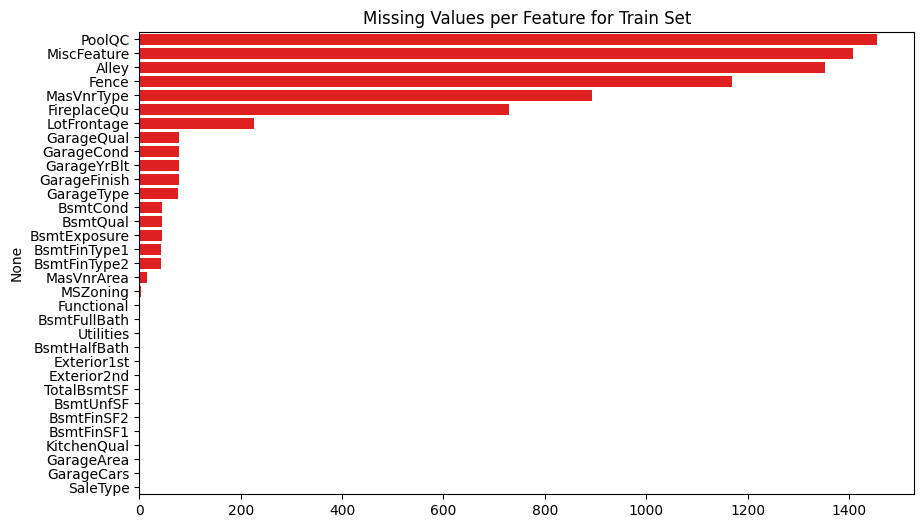

In [13]:
missing = test_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index, color="red")
plt.title("Missing Values per Feature for Train Set")
plt.show()

In [14]:
for col in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','MasVnrType','LotFrontage','GarageType','GarageFinish','GarageQual','GarageYrBlt','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrArea','Electrical','Utilities','Functional','BsmtFullBath','BsmtHalfBath','Exterior1st']:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna("None")
        test_df[col] = test_df[col].fillna("None")

# Numeric missing → median
num_cols = train_df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(train_df[col].median())  # use train median

# Categorical missing → mode
cat_cols = train_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(train_df[col].mode()[0])

print("Missing values (train):", train_df.isnull().sum().sum())
print("Missing values (test):", test_df.isnull().sum().sum())

Missing values (train): 0
Missing values (test): 0


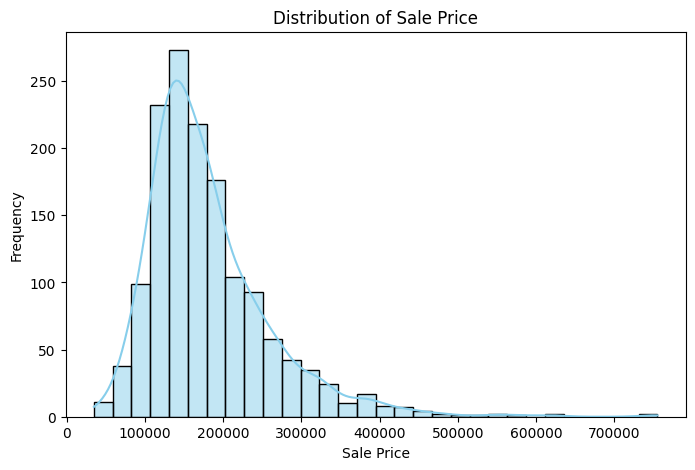

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(train_df["SalePrice"], kde=True, color="skyblue", bins=30)
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()


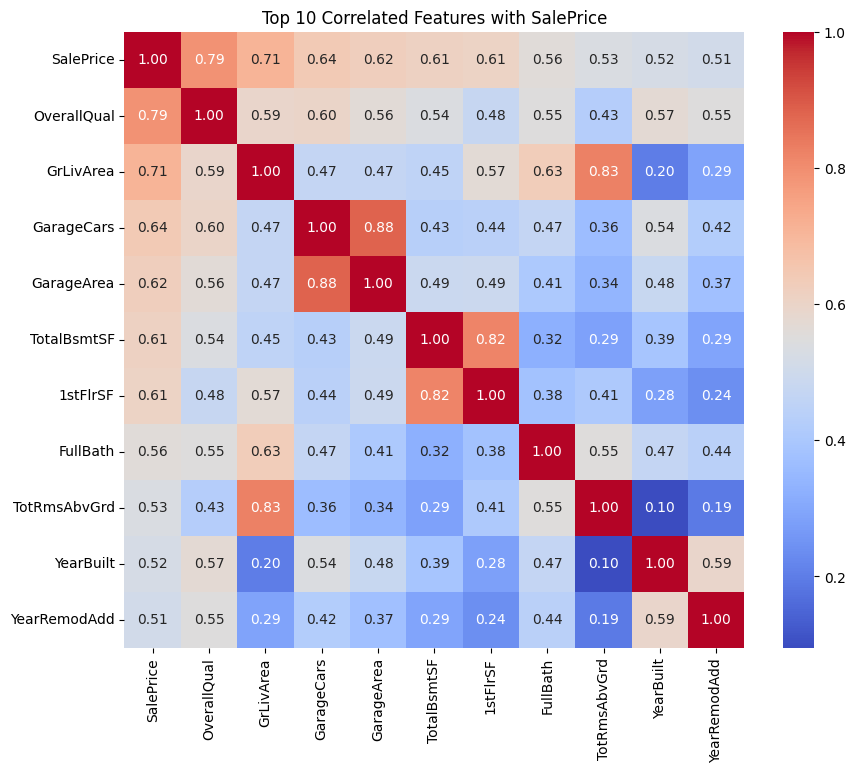

In [16]:
corr = train_df.corr(numeric_only=True)
top_features = corr["SalePrice"].abs().sort_values(ascending=False).head(11).index
plt.figure(figsize=(10,8))
sns.heatmap(train_df[top_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top 10 Correlated Features with SalePrice")
plt.show()

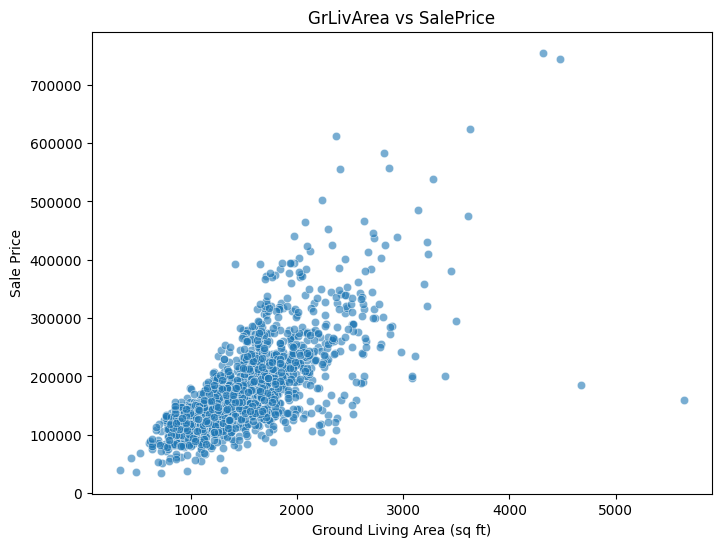

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train_df["GrLivArea"], y=train_df["SalePrice"], alpha=0.6)
plt.title("GrLivArea vs SalePrice")
plt.xlabel("Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.show()

C:\Users\mouni\AppData\Local\Temp\ipykernel_22316\1272572541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="OverallQual", y="SalePrice", data=train_df, palette="viridis")


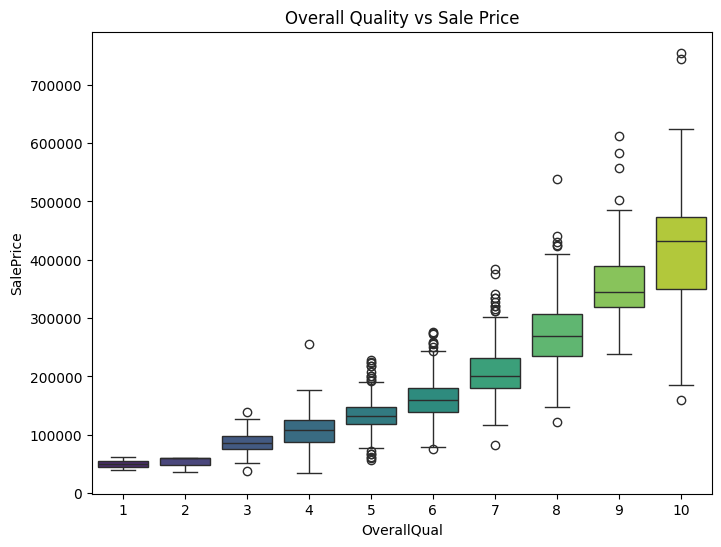

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x="OverallQual", y="SalePrice", data=train_df, palette="viridis")
plt.title("Overall Quality vs Sale Price")
plt.show()

Finding No.of Outliers

In [19]:
Q1 = train_df["SalePrice"].quantile(0.25)
Q3 = train_df["SalePrice"].quantile(0.75)
IQR = Q3 - Q1

outliers = train_df[(train_df["SalePrice"] < (Q1 - 1.5 * IQR)) | (train_df["SalePrice"] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in SalePrice: {len(outliers)}")


Number of outliers in SalePrice: 61


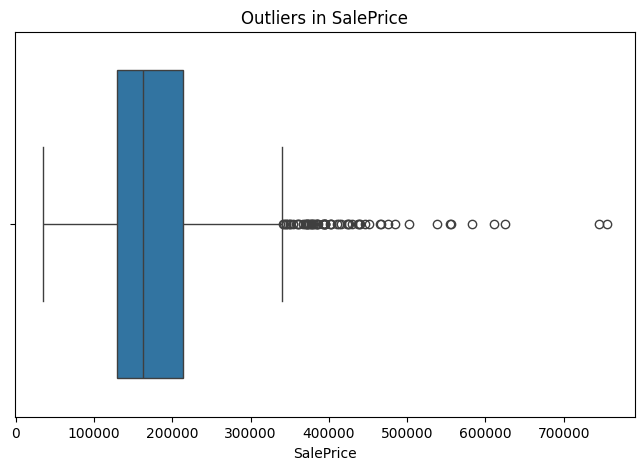

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train_df["SalePrice"])
plt.title("Outliers in SalePrice")
plt.show()

Removing Outliers

In [21]:
y = train_df.drop(outliers.index)
train = train_df.drop(outliers.index)
df = pd.concat([train, test_df], axis=0, ignore_index=True)



In [22]:
# Selecting only the SalePrice column for outlier detection
saleprice = y["SalePrice"]
outliers = saleprice[(saleprice < (Q1 - 1.5 * IQR)) | (saleprice > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in SalePrice: {len(outliers)}")

Number of outliers in SalePrice: 0


In [23]:
full_df = pd.concat([train_df.drop("SalePrice", axis=1), test_df], axis=0)

full_df = pd.get_dummies(full_df, columns=cat_cols, drop_first=True)

print("Shape after encoding:", full_df.shape)

# Split back
train_encoded = full_df.iloc[:len(train_df), :].copy()
test_encoded = full_df.iloc[len(train_df):, :].copy()
train_encoded["SalePrice"] = train_df["SalePrice"].values


Shape after encoding: (2919, 936)


In [24]:
scaler = StandardScaler()
num_cols = train_encoded.select_dtypes(include=['int64','float64']).columns.drop("SalePrice")

train_encoded[num_cols] = scaler.fit_transform(train_encoded[num_cols])
test_encoded[num_cols] = scaler.transform(test_encoded[num_cols])



Test - Train Split

In [ ]:
corr_matrix = train_encoded.corr()
target_corr = corr_matrix["SalePrice"].abs()

# Keep only features with correlation > threshold
threshold = 0.15 
important_features = target_corr[target_corr > threshold].index

train_reduced = train_encoded[important_features]
test_reduced = test_encoded[important_features.drop("SalePrice")] 

print("Final Train Shape:", train_reduced.shape)
print("Final Test Shape:", test_reduced.shape)

Final Train Shape: (1460, 91)
Final Test Shape: (1459, 90)


In [92]:
X_train = train_reduced.drop("SalePrice", axis=1)
y_train = train_reduced["SalePrice"]
X_test = test_reduced

print("Final X_train shape:", X_train.shape)
print("Final X_test shape:", X_test.shape)
print("Target y shape:", y_train.shape)

Final X_train shape: (1460, 90)
Final X_test shape: (1459, 90)
Target y shape: (1460,)


In [93]:
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert all columns to numeric (if possible)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Split train data into training and validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)

# Fit model
xgb_model.fit(X_tr, y_tr)

# Predictions
y_train_pred = xgb_model.predict(X_tr)
y_val_pred = xgb_model.predict(X_val)
y_test_pred = xgb_model.predict(X_test)

#Metrics
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
print("Model Evaluation Metrics")
rmse = np.sqrt(mse)
r2_train = r2_score(y_tr, y_train_pred)
r2_test = r2_score(y_val, y_val_pred)
print(f"MSE  : {mse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"Train R² : {r2_train:.4f}")
print(f"Validation R² : {r2_test:.4f}")


Model Evaluation Metrics
MSE  : 656763968.0000
MAE  : 16736.4570
RMSE : 25627.4066
Train R² : 0.9980
Validation R² : 0.9144


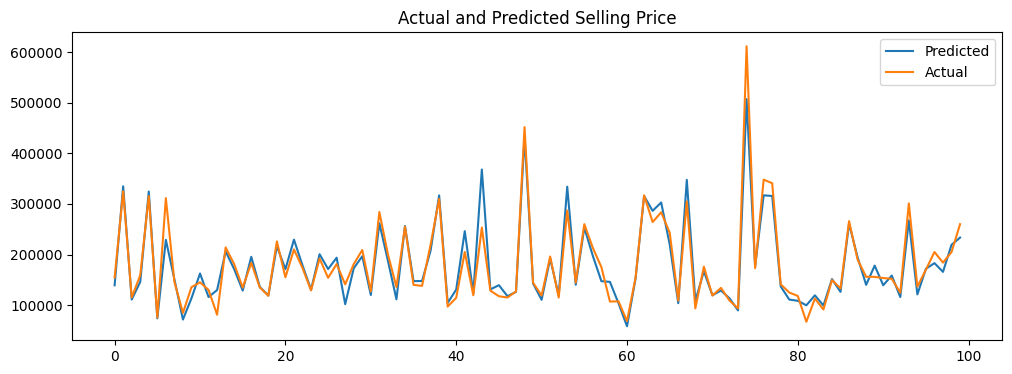

In [94]:

# --- Actual vs Predicted Plot ---

plt.figure(figsize=(12,4))
plt.plot(y_val_pred[:100])
plt.plot(np.array(y_val)[:100])
plt.legend(["Predicted", "Actual"])
plt.title('Actual and Predicted Selling Price', fontsize=12)
plt.show()

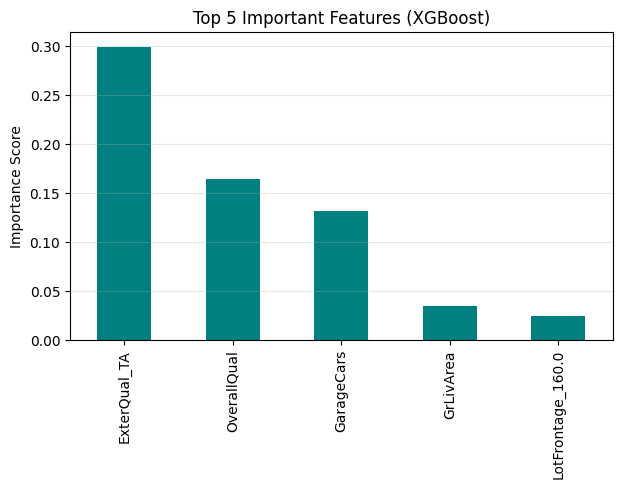


Top 5 Important Features:
ExterQual_TA         0.299406
OverallQual          0.163825
GarageCars           0.131929
GrLivArea            0.034885
LotFrontage_160.0    0.023982
dtype: float32


In [95]:
# --- Feature Importances (Top 5) ---
feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False).head(5)

plt.figure(figsize=(7,4))
top_features.plot(kind='bar', color='teal')
plt.title("Top 5 Important Features (XGBoost)")
plt.ylabel("Importance Score")
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\nTop 5 Important Features:")
print(top_features)

In [96]:
y_pred_test = xgb_model.predict(X_test) 

# Calculate MAPE and approximate prediction accuracy on validation set
y_pred_val = xgb_model.predict(X_val)
mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
accuracy = 100 - mape

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Approximate Prediction Accuracy: {accuracy:.2f}%")

Mean Absolute Percentage Error (MAPE): 10.31%
Approximate Prediction Accuracy: 89.69%


In [97]:
from lightgbm import LGBMRegressor

# Define the LightGBM model
lgb_model = LGBMRegressor(
	n_estimators=500,
	learning_rate=0.05,
	max_depth=5,
	subsample=0.8,
	colsample_bytree=0.8,
	random_state=42
)

# Train model on training split
lgb_model.fit(X_tr, y_tr)

# Predictions
y_train_pred = lgb_model.predict(X_tr)
y_val_pred = lgb_model.predict(X_val)
y_test_pred = lgb_model.predict(X_test)

# --- Metrics ---
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2_train = r2_score(y_tr, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

print("📊 LightGBM Model Evaluation Metrics")
print(f"MSE  : {mse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"Train R² : {r2_train:.4f}")
print(f"Validation R² : {r2_val:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2524
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 85
[LightGBM] [Info] Start training from score 181441.541952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

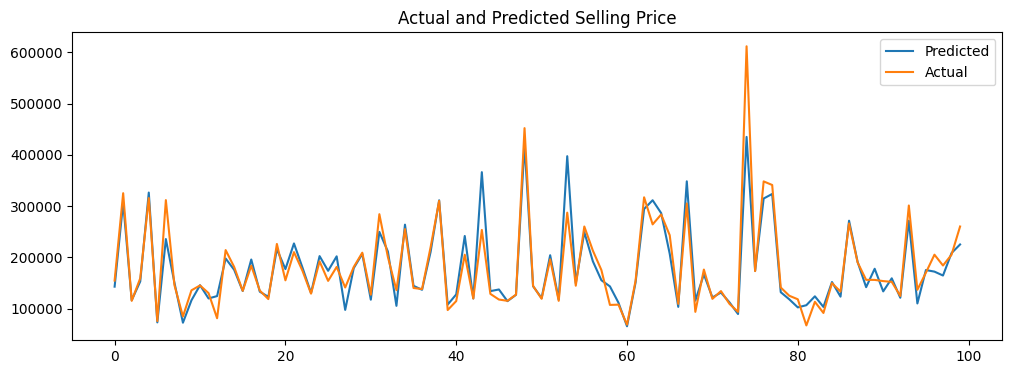

In [98]:
plt.figure(figsize=(12,4))
plt.plot(y_val_pred[:100])
plt.plot(np.array(y_val)[:100])
plt.legend(["Predicted", "Actual"])
plt.title('Actual and Predicted Selling Price', fontsize=12)
plt.show()

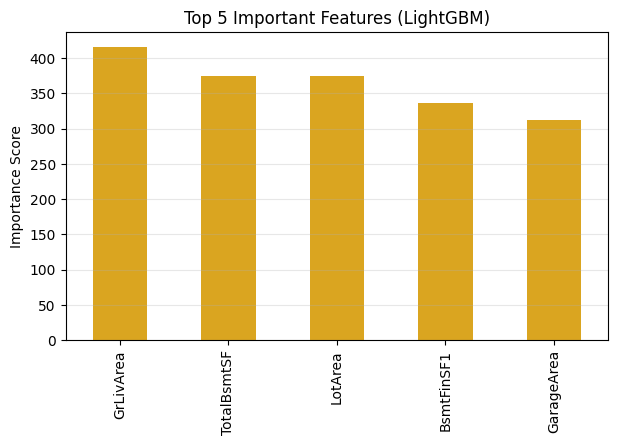


🏆 Top 5 Important Features:
GrLivArea      416
TotalBsmtSF    375
LotArea        374
BsmtFinSF1     336
GarageArea     312
dtype: int32


In [99]:
# --- Feature Importances (Top 5) ---
feature_importances = pd.Series(lgb_model.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False).head(5)

plt.figure(figsize=(7,4))
top_features.plot(kind='bar', color='goldenrod')
plt.title("Top 5 Important Features (LightGBM)")
plt.ylabel("Importance Score")
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\n🏆 Top 5 Important Features:")
print(top_features)


In [100]:
y_pred_test = lgb_model.predict(X_test) 

# Calculate MAPE and approximate prediction accuracy on validation set
y_pred_val = lgb_model.predict(X_val)
mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
accuracy = 100 - mape

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Approximate Prediction Accuracy: {accuracy:.2f}%")

Mean Absolute Percentage Error (MAPE): 10.66%
Approximate Prediction Accuracy: 89.34%


In [101]:
from sklearn.ensemble import RandomForestRegressor

# Split the data to get y_test
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model
rfg_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfg_model.fit(X_tr, y_tr)

# Evaluate and visualize
y_train_pred = rfg_model.predict(X_tr)
y_val_pred = rfg_model.predict(X_val)
y_test_pred = rfg_model.predict(X_test)

# --- Metrics ---
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2_train = r2_score(y_tr, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

print("📊 LightGBM Model Evaluation Metrics")
print(f"MSE  : {mse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"Train R² : {r2_train:.4f}")
print(f"Validation R² : {r2_val:.4f}")

📊 LightGBM Model Evaluation Metrics
MSE  : 805276298.2936
MAE  : 17671.0897
RMSE : 28377.3906
Train R² : 0.9791
Validation R² : 0.8950


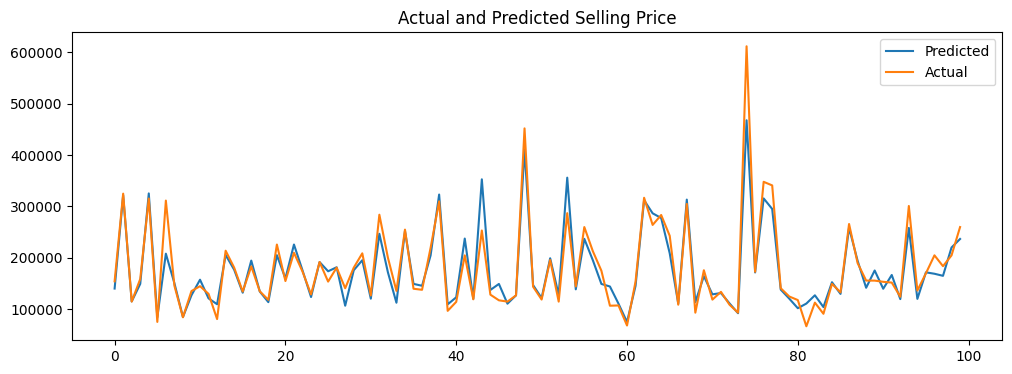

In [102]:
plt.figure(figsize=(12,4))
plt.plot(y_val_pred[:100])
plt.plot(np.array(y_val)[:100])
plt.legend(["Predicted", "Actual"])
plt.title('Actual and Predicted Selling Price', fontsize=12)
plt.show()

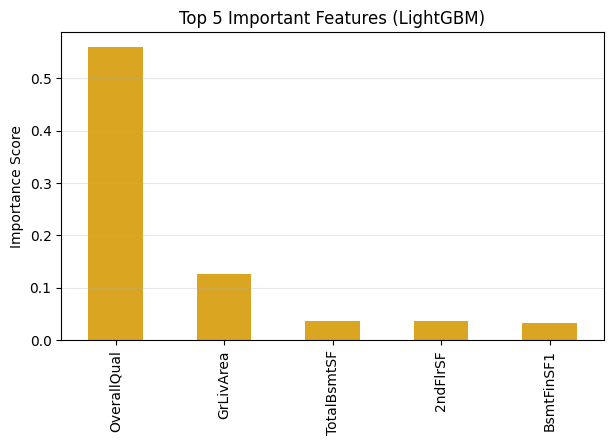


🏆 Top 5 Important Features:
OverallQual    0.560382
GrLivArea      0.125640
TotalBsmtSF    0.036888
2ndFlrSF       0.036004
BsmtFinSF1     0.033384
dtype: float64


In [103]:
feature_importances = pd.Series(rfg_model.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False).head(5)

plt.figure(figsize=(7,4))
top_features.plot(kind='bar', color='goldenrod')
plt.title("Top 5 Important Features (LightGBM)")
plt.ylabel("Importance Score")
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\n🏆 Top 5 Important Features:")
print(top_features)

In [104]:
y_pred_test = rfg_model.predict(X_test) 

# Calculate MAPE and approximate prediction accuracy on validation set
y_pred_val = rfg_model.predict(X_val)
mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
accuracy = 100 - mape

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Approximate Prediction Accuracy: {accuracy:.2f}%")

Mean Absolute Percentage Error (MAPE): 10.94%
Approximate Prediction Accuracy: 89.06%


In [105]:
def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n--- {name} ---")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.3f}")
    return r2

# Evaluate both models on validation data
r2_xgb = evaluate_model(y_val, xgb_model.predict(X_val), "XGBoost")
r2_lgb = evaluate_model(y_val, lgb_model.predict(X_val), "LightGBM")

best_model = "XGBoost" if r2_xgb > r2_lgb else "LightGBM"
print(f"\n✅ Best Model Selected: {best_model}")


--- XGBoost ---
MAE  : 16736.46
RMSE : 25627.41
R²   : 0.914

--- LightGBM ---
MAE  : 17907.79
RMSE : 30175.89
R²   : 0.881

✅ Best Model Selected: XGBoost


In [106]:
if best_model == "XGBoost":
    final_preds = xgb_model.predict(X_test)
else:
    final_preds = lgb_model.predict(X_test)

📊 Model Evaluation Metrics:
MAE: 16736.46
RMSE: 25627.41
MAPE: 10.31%
Model Accuracy: 89.69%


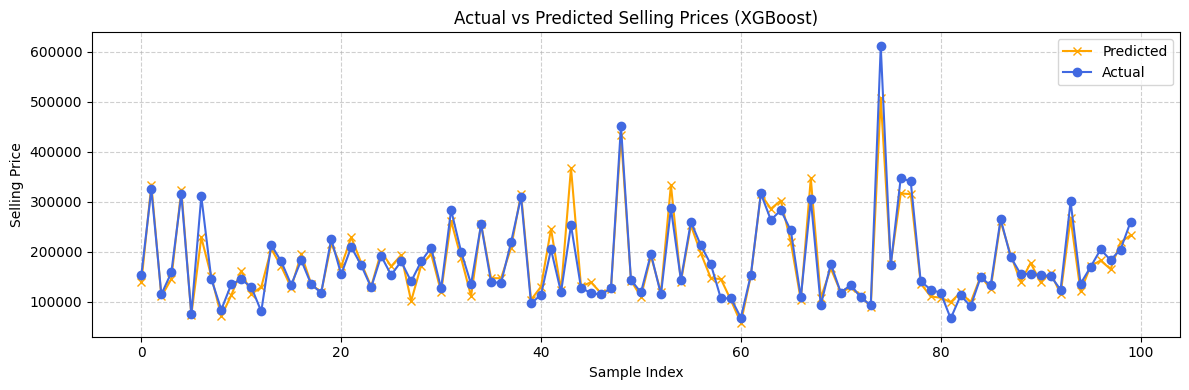

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on validation set
y_pred = xgb_model.predict(X_val)
y_true = np.array(y_val)

# --- Calculate Metrics ---
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
accuracy = 100 - mape

# --- Print Results ---
print(f"📊 Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"Model Accuracy: {accuracy:.2f}%")

# --- Plot Actual vs Predicted ---
plt.figure(figsize=(12,4))
plt.plot(y_pred[:100], label="Predicted", color='orange', marker='x')
plt.plot(y_true[:100], label="Actual", color='royalblue', marker='o')
plt.title('Actual vs Predicted Selling Prices (XGBoost)', fontsize=12)
plt.xlabel("Sample Index")
plt.ylabel("Selling Price")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


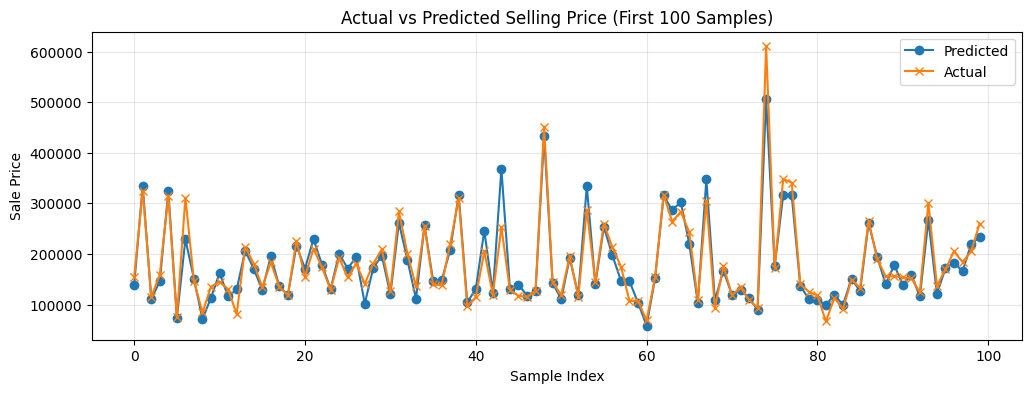

📊 Model Performance on 100 Validation Samples:
MAE  : 15579.40
RMSE : 24276.14
R²   : 0.919
Mean Absolute Percentage Error (MAPE): 8.90%
Prediction Accuracy: 91.10%


In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Take the first 100 samples from your validation set
n = 100
y_true_sample = np.array(y_val)[:n]
y_pred_sample = xgb_model.predict(X_val)[:n]  # or lgb_model.predict(X_val) if LightGBM was better

# Plot Actual vs Predicted for visual accuracy
plt.figure(figsize=(12, 4))
plt.plot(y_pred_sample, label="Predicted", marker='o')
plt.plot(y_true_sample, label="Actual", marker='x')
plt.title("Actual vs Predicted Selling Price (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Sale Price")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate and display accuracy metrics for the 100 samples
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_100 = mean_absolute_error(y_true_sample, y_pred_sample)
rmse_100 = np.sqrt(mean_squared_error(y_true_sample, y_pred_sample))
r2_100 = r2_score(y_true_sample, y_pred_sample)

print("📊 Model Performance on 100 Validation Samples:")
print(f"MAE  : {mae_100:.2f}")
print(f"RMSE : {rmse_100:.2f}")
print(f"R²   : {r2_100:.3f}")
mape = np.mean(np.abs((y_true_sample - y_pred_sample) / y_true_sample)) * 100
accuracy = 100 - mape

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

In [109]:
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

Mean Absolute Percentage Error (MAPE): 8.90%
Prediction Accuracy: 91.10%


In [110]:
import pandas as pd
import numpy as np

# Create comparison DataFrame with percentage error
comparison_df = pd.DataFrame({
    "Actual Sale Price": y_true,
    "Predicted Sale Price": y_pred.round(2)
})

# Calculate percentage error for each prediction
comparison_df["Accuracy(%)"] = 100 - np.abs(
    (comparison_df["Actual Sale Price"] - comparison_df["Predicted Sale Price"]) /
    comparison_df["Actual Sale Price"] * 100
)

sample_count = 6
print(f"\nSample Comparison (First {sample_count} values):\n")
comparison_df.head(sample_count)


Sample Comparison (First 6 values):



,Actual Sale Price,Predicted Sale Price,Accuracy(%)
0,154500,139174.828125,90.080795
1,325000,334833.062500,96.974442
2,115000,110971.546875,96.496997
3,159000,145867.609375,91.740635
4,315500,324556.625000,97.129437
5,75500,73861.921875,97.830360


In [ ]:
import joblib

# Suppose your trained model variable is named 'model'
# Replace 'model' with the actual variable name in your notebook
joblib.dump(xgb_model, 'house_price_prediction_model.pkl')

print("✅ Model saved successfully as 'house_price_prediction_model.pkl")



✅ Model saved successfully as 'house_price_prediction_model.pkl'
